# Elementary 1D Cellular Automata

I recently read the book <a href='http://www.wolframscience.com/nks/'>A New Kind of Science</a> from Stephen Wolfram, which intrigued me to try it out with python.
Stephen Wolfram establishes the notion that high complexity arises out of very simplistic rules, contrary to common perception that to create highly complex systems you need very complex set of rules. He often points out to the nature, how we see extremely complex systems, patterns, structures in nature. However they are based on very simple rules.

Cellular automata are discrete dynamical systems evolving on a grid of cells. These cells can be in a finite number of states (for example, on/off). The evolution of a cellular automaton is governed by a set of rules, describing how the state of a cell changes according to the state of its neighbors.

Although extremely simple, these models can initiate highly complex and chaotic behaviors. Cellular automata can model real-world phenomena such as car traffic, chemical reactions, propagation of fire in a forest, epidemic propagations, and much more. Cellular automata are also found in nature. For example, the patterns of some seashells are generated by natural cellular automata.
<br>
<img src='https://qph.ec.quoracdn.net/main-qimg-35bb8d33d309acd0cf52cc6986c60472-c'>

In [257]:
#Imports
import numpy as np
import copy
import math
import matplotlib.pyplot as plt
from IPython.display import YouTubeVideo
%matplotlib inline
plt.rcParams['figure.figsize'] = [100, 100]

## Elementary States
You can see the visualization of 8 elmentary states below. The cell will either be 1 or 0 based on its three neighbours on top in previous iteration.

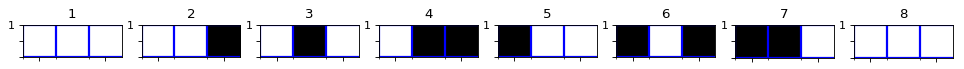

In [216]:
#Lets see the elementary states
elementary_states = [np.binary_repr(_, width=3) for _ in range(8)]
print(elementary_states)

#the code below is only for representation of states
es=np.array([np.array(list(map(int, list(_))), dtype=int).reshape(1,3) for _ in elementary_states])
fig, ax_array = plt.subplots(1, 8,squeeze=False, figsize=(15,1), dpi= 80, facecolor='w', edgecolor='k')
for i,ax_row in enumerate(ax_array):
    for j,axes in enumerate(ax_row):
        axes.set_title('{}'.format(j+1))
        axes.set_xticklabels(np.arange(1, 2, 1));
        axes.set_yticklabels(np.arange(1, 2, 1));

        # Minor ticks
        axes.set_xticks(np.arange(-.5, 2, 1), minor=True);
        axes.set_yticks(np.arange(-.5, 2, 1), minor=True);        
        axes.grid(which='minor', color='b', linestyle='-', linewidth=2)
        axes.imshow(es[j], cmap='Greys', interpolation='nearest', aspect='equal')

based on 8 states we can create total of 256 different rules based on binary representation. You can see more details here: https://www.youtube.com/watch?v=M_pkidxeGMY

In [230]:
#lets define elementary rules for these states, following the binary representation of 8 bit numbers
def make_rule(num):
    rule = {}
    num_bytes = np.binary_repr(num, width=8)[::-1]
    for i, key in enumerate(elementary_states):
        rule[key] = int(num_bytes[i])
    return rule

#All possible Elementary rules for elementary states 
ELEMENTARY_RULES = [
    make_rule(x) for x in range(256)
]

Above, I created a list of dictionaries to hold all the rules, Lets see the representation of famous rule 30

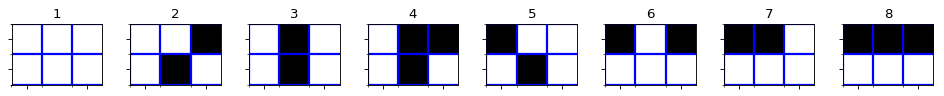

In [240]:
#Lets try to see representation of a one of the rules, eg. 30
rule_to_represent = 30
r = ELEMENTARY_RULES[rule_to_represent]
rep = np.array([np.array(list(map(int, list(k+'0{}0'.format(v)))), dtype=int).reshape(2,3) for k,v in r.items()])

# plot the datda
fig, ax_array = plt.subplots(1, 8,squeeze=False, figsize=(15,1), dpi= 80, facecolor='w', edgecolor='k')
for i,ax_row in enumerate(ax_array):
    for j,axes in enumerate(ax_row):
        axes.set_title('{}'.format(j+1))
                       
        axes.set_xticklabels(np.arange(1, 2, 1))
        axes.set_yticklabels(np.arange(1, 2, 1))

        # Minor ticks
        axes.set_xticks(np.arange(-.5, 2, 1), minor=True)
        axes.set_yticks(np.arange(-.5, 2, 1), minor=True)

        # Gridlines based on minor ticks
        axes.grid(which='minor', color='b', linestyle='-', linewidth=2)
        axes.imshow(rep[j], cmap='Greys', interpolation='nearest', aspect='equal')

## Simulation of Famous Rule 30 upto 100 evolutions

Based on this rule, lets create the 100 evolutions of this rule startin with only 1 bit on in the center

In [248]:
GRID_SIZE = 100
grid = np.zeros((GRID_SIZE, GRID_SIZE), dtype=int)
# Setting center block of first row as 1
grid[0][math.ceil(GRID_SIZE/2)] = 1
print (ELEMENTARY_RULES[rule_to_represent])

{'000': 0, '001': 1, '010': 1, '011': 1, '100': 1, '101': 0, '110': 0, '111': 0}


Lets see the initial state of our grid:

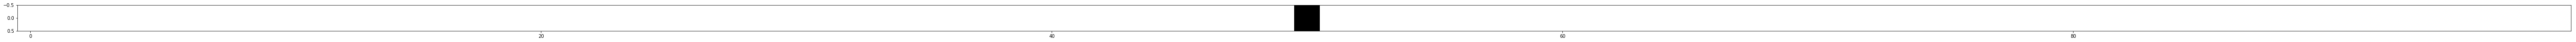

In [250]:
plt.imshow(grid[0].reshape(1,100), cmap='Greys', interpolation='nearest')
plt.show()

Here are the simulations of rule 30 upto 100 rows, based on above shown inital state


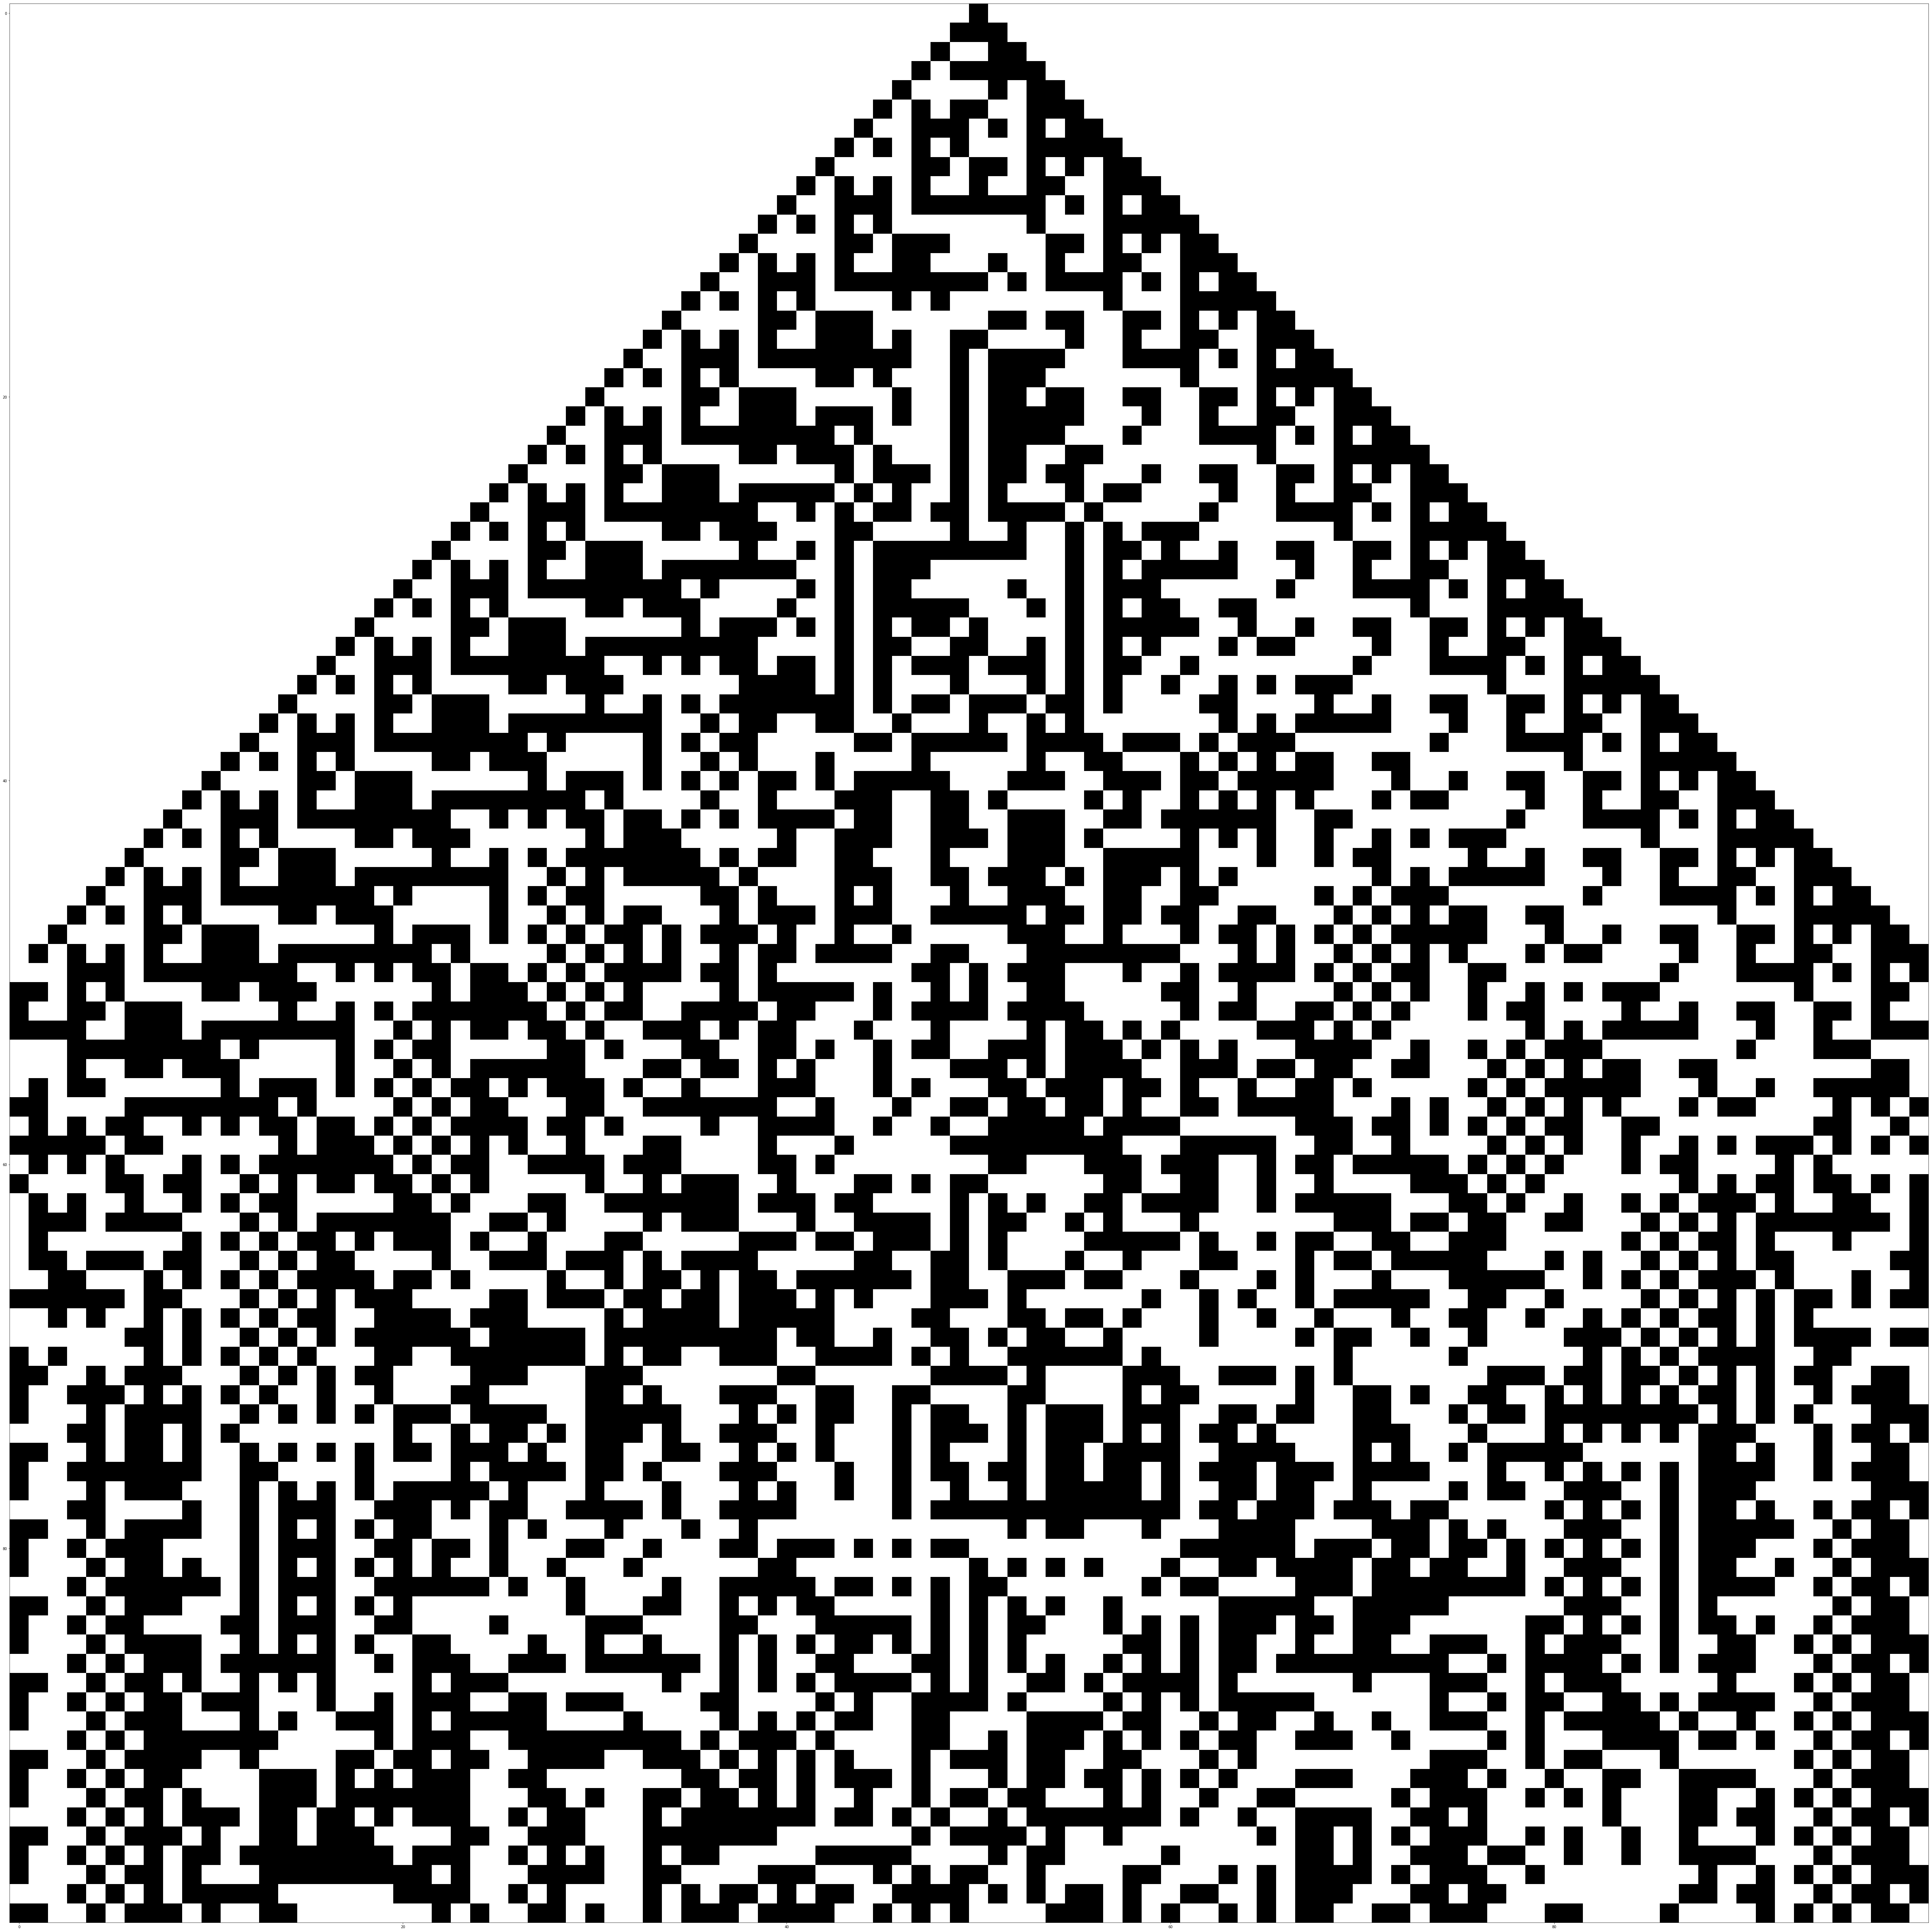

In [242]:
# Here are the simulations of rule 30 upto 100 rows, based on above shown inital state
for i, current_row in enumerate(grid):
    if i==0:
        continue
    prev_row = grid[i-1]
    for j in range(GRID_SIZE):
        rolled = np.roll(prev_row,j+1,axis=0)
        state = "".join(map(str,rolled[:3]))
        current_row[j] = ELEMENTARY_RULES[rule_to_represent][state]
plt.imshow(grid, cmap='Greys', interpolation='nearest')
plt.show()

## Simulation of all 256 Rules
now, lets see the simulation of all 256 rules based on same initial condition provided

In [251]:
num_columns = 16
num_rows = 16
grids = np.array([np.zeros((GRID_SIZE, GRID_SIZE), dtype=int) for _ in range(num_rows*num_columns)]).reshape(num_columns,num_rows,GRID_SIZE,GRID_SIZE)
print(grids.shape)

(16, 16, 100, 100)


In [252]:
rule=0
for ix,iy in np.ndindex(grids.shape[:2]):
    grid = grids[ix][iy]
    grid[0][math.ceil(GRID_SIZE/2)] = 1
    for i, current_row in enumerate(grid):
        if i==0:
            continue
        prev_row = grid[i-1]
        for j in range(GRID_SIZE):
            rolled = np.roll(prev_row,j+1,axis=0)
            state = "".join(map(str,rolled[:3]))
            current_row[j] = ELEMENTARY_RULES[rule][state]
    rule+=1

In [253]:
fig, ax_array = plt.subplots(num_rows, num_columns,squeeze=False, figsize=(100, 100), dpi= 160, facecolor='w', edgecolor='k')
for i,ax_row in enumerate(ax_array):
    for j,axes in enumerate(ax_row):
        axes.set_title('RULE {}'.format(i*num_columns+j))
        axes.set_yticklabels([])
        axes.set_xticklabels([])
        axes.imshow(grids[i][j], cmap='Greys')

plt.show()

## Simlutation of All 256 rules based on random initial States
we see alot of rules which did not evolve and died out, while some produced greate complexity or nested behaviours. Lets see the behaviour of same rules based on random initial conditions

In [244]:
grids_2 = np.array([np.zeros((GRID_SIZE, GRID_SIZE), dtype=int) for _ in range(num_rows*num_columns)]).reshape(num_columns,num_rows,GRID_SIZE,GRID_SIZE)
print(grids_2.shape)

(16, 16, 100, 100)


In [254]:
rule=0
for ix,iy in np.ndindex(grids_2.shape[:2]):
    grid = grids_2[ix][iy]
    # Lets initalize the first row with random initial state
    grid[0] = np.random.randint(2, size=GRID_SIZE)
    for i, current_row in enumerate(grid):
        if i==0:
            continue
        prev_row = grid[i-1]
        for j in range(GRID_SIZE):
            rolled = np.roll(prev_row,j+1,axis=0)
            state = "".join(map(str,rolled[:3]))
            current_row[j] = ELEMENTARY_RULES[rule][state]
    rule+=1

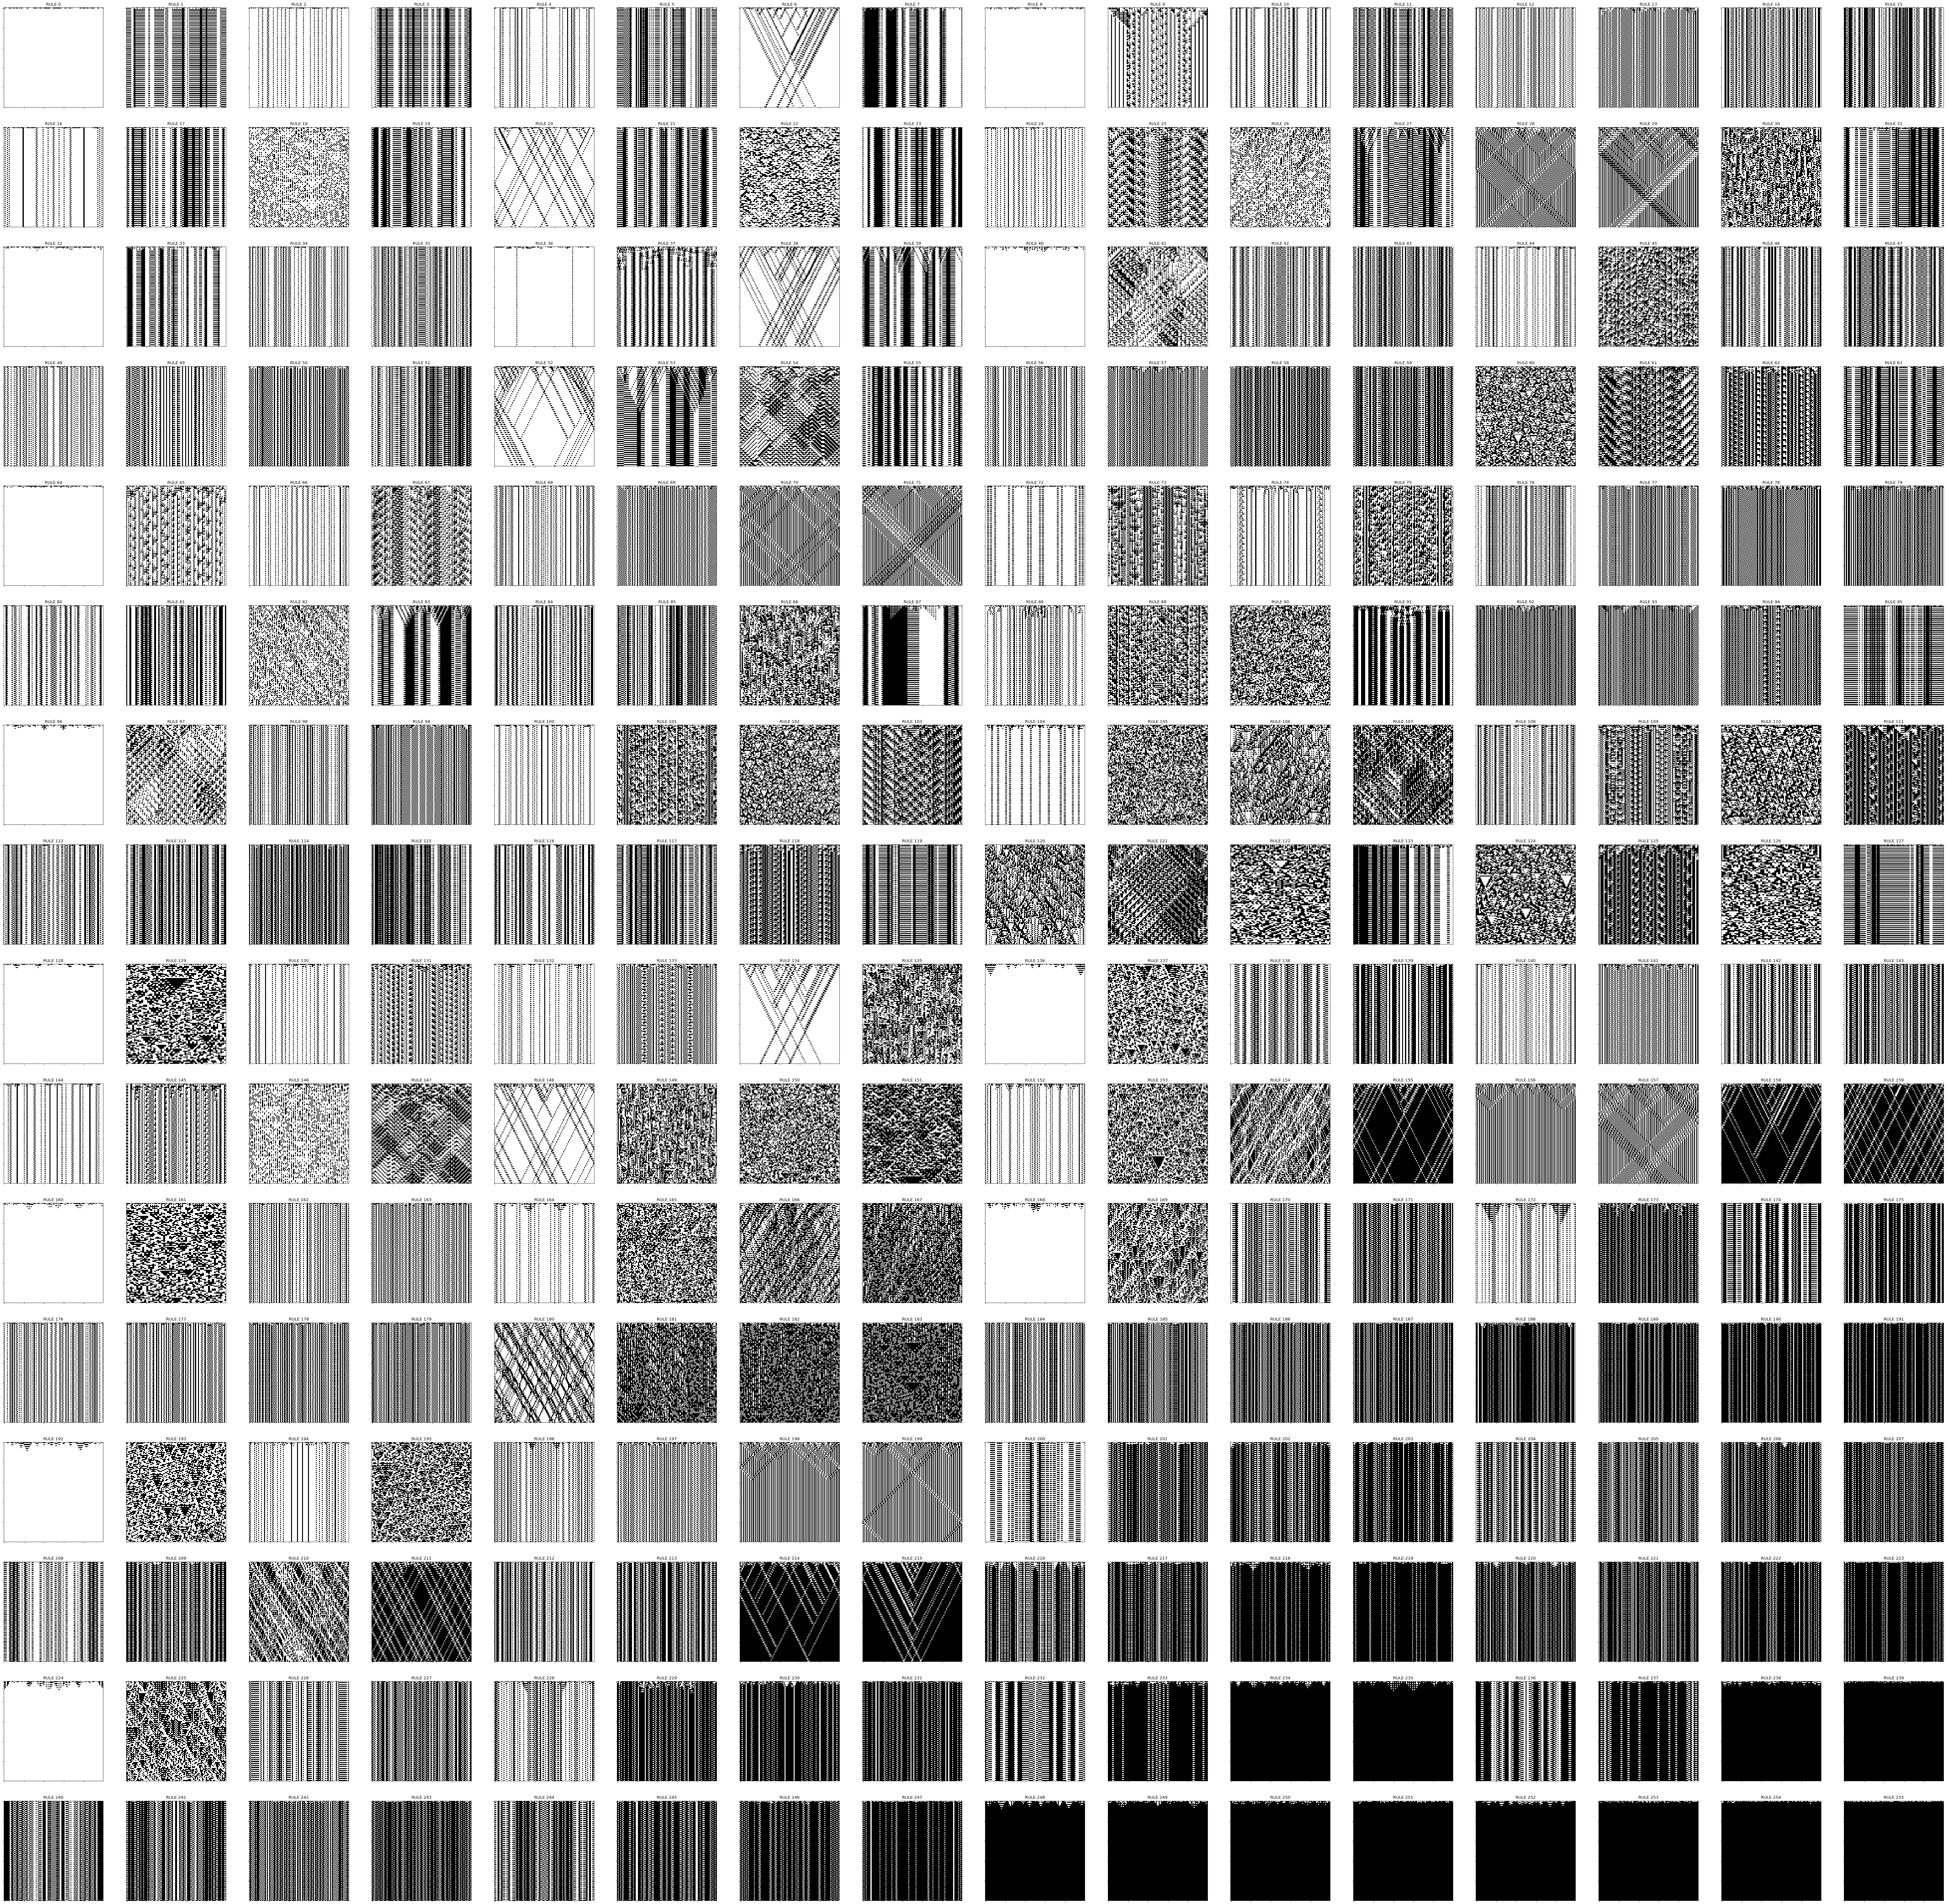

In [246]:
fig, ax_array = plt.subplots(num_rows, num_columns,squeeze=False, figsize=(100, 100), dpi= 160, facecolor='w', edgecolor='k')
for i,ax_row in enumerate(ax_array):
    for j,axes in enumerate(ax_row):
        axes.set_title('RULE {}'.format(i*num_columns+j))
        axes.set_yticklabels([])
        axes.set_xticklabels([])
        axes.imshow(grids_2[i][j], cmap='Greys')

plt.show()

most of the rules which showed no progress with first initial condition tend to show the same behaviour even with the randomized initial conditions

## Whats Next:
It is interesting to see how such basic and simple rules create such chaotic behaviours. Some of the applications of cellular automata are in random number generation, Simulation of waves and particles etc.
It would be interesting to try out conways game of life.

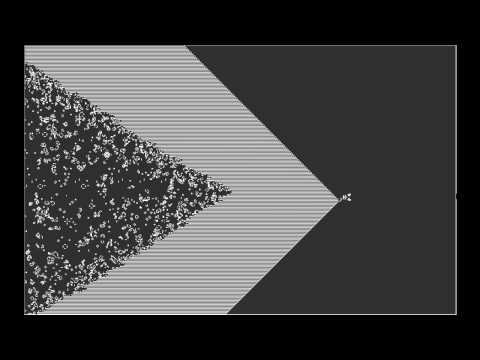

In [258]:
YouTubeVideo('C2vgICfQawE', width=900, height=400)